<a href="https://colab.research.google.com/github/MsAnalyst/StatisticsforBusinessFP/blob/main/Statistics_for_Business_Final_Project_Sleep_Disorder_(Dewi_I4Zs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistics for Business - Final Project on Sleep Disorder**
# Student: Dewi Astuti (Dewi_I4Zs)

Analysis on Factors that Contributes to Sleep Disorders


# **A. Project Background**

This project aims to delve into the realm of sleep disorders from a statistical perspective and shed light on the various aspects that influence sleep quality and quantity. By utilizing statistical analysis, we can identify underlying patterns in sleep data and the major contributors to sleep disorders among employees, enabling businesses to make informed decisions to enhance employee wellness programs and optimize productivity.

In [ ]:
# Import modules for reading data and mathematical operations
import pandas as pd
import numpy as np

# Import modules for visualisation
import seaborn as sns
import plotly.express as px
from termcolor import colored
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Import the module for the linear regression model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Import module
from scipy.stats import f_oneway
from scipy.stats import ttest_ind,levene,kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.diagnostic import normal_ad
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

# Set default theme
pd.set_option('display.max_columns', None)
plt.style.use('bmh')
sns.set()

# Fix warnings
import warnings
warnings.simplefilter('ignore')


#**B. Dataset**

In [ ]:
# Import the data
# url = '/content/Sleep_health_and_lifestyle_dataset.csv'
# df = pd.read_csv(url)
df=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv',encoding='latin1')
df


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Variabel target (outcome) yang dipakai adalah **Sleep Disorder**.

## **B.1. Data Description**



The Sleep Health and Lifestyle Dataset comprises 374 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

**Data Description**

Key Features of the Dataset:
- Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns.
- Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.
- Cardiovascular Health: Examine blood pressure and heart rate measurements.
- Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.



In [ ]:
# View the columns attribute
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

**Dataset Columns:**
1. **Person ID**:  A unique identifier for each person.
2. **Gender**: The person's gender (Male/Female).
3. **Age**: The person's age in years.
4. **Occupation**: The person's profession or job.
5. **Sleep Duration (hours)**: The number of hours the person sleeps per day.
6. **Quality of Sleep (scale: 1-10)**: A subjective rating of the person's sleep quality, ranging from 1 to 10.
7. **Physical Activity Level (minutes/day)**: The number of minutes the person engages in physical activity daily.
8. **Stress Level (scale: 1-10)**: A subjective rating of the person's stress level, ranging from 1 to 10.
9. **BMI Category**: The person's BMI category, such as Underweight, Normal, or Overweight.
10. **Blood Pressure (systolic/diastolic)**: The blood pressure measurement of the person, represented as systolic pressure over diastolic pressure.
11. **Heart Rate (bpm)**: The person's resting heart rate in beats per minute.
12. **Daily Steps**: The number of steps the person takes per day.
13. **Sleep Disorder**: Indicates whether the person has a sleep disorder (None, Insomnia, Sleep Apnea).

**Details about Sleep Disorder Column**:
*None: The person does not show any specific sleep disorder.
*Insomnia: The person faces challenges in initiating or maintaining sleep, which leads to insufficient or substandard sleep quality.
*Sleep Apnea: The person experiences interruptions in breathing while asleep, causing disruptions in sleep patterns and possible health hazards.



**Define The Problems:**

1. Which variables in the data have an influence on the probability of a person experiencing sleep disorder?
2. Does the stress variable have a strong relationship with the probability of a person experiencing sleep disorder?
3. Does the age variable have a strong relationship with a person's probability of experiencing sleep disorder?
4. Does the gender variable have a strong relationship with a person's probability of experiencing sleep disorder?
5. Does the variable physical activity level, BMI Category, and daily steps have a strong relationship with the probability of a person experiencing sleep disorder?
6. What is the final conclusion? What are the recommendations?

## **B.2. Data Cleaning**

We will:
1. Drop Unused Variable
2. Create Simpler Column Names
3. Check Number of Unique Values in Each Column
4. Missing Values and Duplicated Data
5. Transform Categorical Parameters

**1. Drop Unused Variable**

In [ ]:
# Remove column 'Person ID'
df.drop('Person ID', axis=1, inplace=True)
print("Successfully dropped Person ID")

Successfully dropped Person ID


**2. Create Simpler Column Names**

In [ ]:
# Update the column names

new_column_name = ['gender', 'age', 'occupation', 'sleep_duration', 'quality_of_sleep',
                   'physical_activity_level', 'stress_level', 'bmi_category', 'blood_pressure',
                   'heart_rate', 'daily_steps', 'sleep_disorder']

df.columns = new_column_name

**3. Check Number of Unique Values in Each Column**

In [ ]:
# Check the number of unique values in each column
print ("Unique values in each column are:")
for col in df.columns:
    print(col, df[col].nunique())

Unique values in each column are:
gender 2
age 31
occupation 11
sleep_duration 27
quality_of_sleep 6
physical_activity_level 16
stress_level 6
bmi_category 4
blood_pressure 25
heart_rate 19
daily_steps 20
sleep_disorder 2


**4. Check Missing Values and Duplicated Data**

In [ ]:
# Check the proportion of missing values data in each feature.
# Check whether there is any duplicated data.

print("Missing values proportion:")
print(df.isnull().sum())
print("Duplicated data:")
print(df.duplicated().sum()) # On duplicated data

Missing values proportion:
gender                       0
age                          0
occupation                   0
sleep_duration               0
quality_of_sleep             0
physical_activity_level      0
stress_level                 0
bmi_category                 0
blood_pressure               0
heart_rate                   0
daily_steps                  0
sleep_disorder             219
dtype: int64
Duplicated data:
242


In [ ]:
# Replace the null values with 'None' in the column 'Sleep Disorder'
df['sleep_disorder'].fillna('None', inplace=True)

Result:
- Data is clean, no need to handle missing values.
- No duplicated data, we don't need to handle duplicate data.
- The nan/None value in sleep disorder stands for no sleep disorder, so it is not a missing value.


**5. Transform Categorical Parameters**

Occupation (multi-class): Some occupations are underrepresented in the data, making it challenging to draw meaningful conclusions. The solution is to put all occupations with fewer than 20 instances and designate them as an "unknown" class.

BMI Category (multi-class): The distribution between overweight and normal categories is well-balanced. However, there appears to be a typo in the category label "Normal Weight," which will be corrected to "Normal."

Sleep Disorder (multi-class): The distribution of sleep disorders shows an equal split between individuals with and without sleep disorders. Among those with sleep disorders, the specific disorders are divided into sleep apnea and insomnia. This variable may serve as a potential response variable in the analysis.

Sleep Patterns and Blood Pressure In another study, sleep patterns significantly predicted SBP and DBP in multivariable‐adjusted models, thus it is important to look detailed into Systolic Blood Pressure (SBP) and Diastolic Blood Pressure (DBP)


In [ ]:
# Count how many dataset with certain occupation
df.value_counts('occupation').T

,count
occupation,
Nurse,73
Doctor,71
Engineer,63
Lawyer,47
Teacher,40
Accountant,37
Salesperson,32
Scientist,4
Software Engineer,4


In [ ]:
# Replace Sales Representative with Salesperson in the Occupation column
df['occupation'] = df['occupation'].replace('Sales Representative', 'Salesperson')
print(f"All Sales Representative have been referred as Salesperson")

cut_off = 20
new_label = "Unknown"

count_data = df["occupation"].value_counts()
to_replace = count_data[count_data < cut_off].index

df["occupation"] = df["occupation"].replace(to_replace, new_label)
print(f"All occupation below {cut_off} have been designated to {new_label}")

All Sales Representative have been referred as Salesperson
All occupation below 20 have been designated to Unknown


In [ ]:
# Encode missing values in 'Sleep Disorder' to 'None'
df['sleep_disorder'].fillna('None', inplace=True)
print("Successfully encode the missing values in sleep_disorder to 'None'")

# Correct the inconsistency in 'BMI Category'
df['bmi_category'].replace({'Normal Weight': 'Normal'}, inplace=True)
print("Successfully rename the bmi category of 'Normal Weight' as 'Normal'")

# Split the 'Blood Pressure' column into 'Systolic' and 'Diastolic' columns
df['systolic'] = df['blood_pressure'].str.split('/').str[0].astype(int)
df['diastolic'] = df['blood_pressure'].str.split('/').str[1].astype(int)

# Remove column 'Blood Pressure'
df.drop('blood_pressure', axis=1, inplace=True)
print("Successfully created numeric categories systolic and diastolic, dropped blood_pressure")

Successfully encode the missing values in sleep_disorder to 'None'
Successfully rename the bmi category of 'Normal Weight' as 'Normal'
Successfully created numeric categories systolic and diastolic, dropped blood_pressure


##**B.3. Exploratory Data Analysis**


Exploratory Data Analysis (EDA) will be performed to understand the data distributions, look for any anomalies or interesting patterns. First, we will generate descriptive statistics to understand the central tendency, dispersion, and shape of the dataset's distribution.

Next, we will analyze the distribution of key numerical and categorical variables and their relationship with the presence of a sleep disorder. We are particularly focusing on the "Sleep Disorder" column, as it is our target variable for prediction.

For this analysis, we will consider sleep duration and sleep disorder as our response variables, as they provide a combination of numeric and categorical insights, making the study more intriguing.

**1. Descriptive Statistics**

In [ ]:
# Descriptive statistics
descriptive_stats = df.describe().T

# Check the unique values from categorical columns
unique_values = {}
cat_columns = ['gender', 'occupation', 'bmi_category', 'sleep_disorder']
for col in cat_columns:
    unique_values[col] = df[col].unique()

display(descriptive_stats, unique_values)

,count,mean,std,min,25%,50%,75%,max
age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.0,59.0
sleep_duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.8,8.5
quality_of_sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.0,9.0
physical_activity_level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.0,90.0
stress_level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.0,8.0
heart_rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.0,86.0
daily_steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.0,10000.0
systolic,374.0,128.553476,7.748118,115.0,125.00,130.0,135.0,142.0
diastolic,374.0,84.649733,6.161611,75.0,80.00,85.0,90.0,95.0


{'gender': array(['Male', 'Female'], dtype=object),
 'occupation': array(['Unknown', 'Doctor', 'Salesperson', 'Teacher', 'Nurse', 'Engineer',
        'Accountant', 'Lawyer'], dtype=object),
 'bmi_category': array(['Overweight', 'Normal', 'Obese'], dtype=object),
 'sleep_disorder': array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)}

The descriptive statistics provide the following insights:
* The average age of individuals in the dataset is approximately 42 years, with a minimum of 27 and a maximum of 59 years.
* The average sleep duration is approximately 7.13 hours, with a minimum of 5.8 and a maximum of 8.5 hours.
* The average quality of sleep rating is 7.31 on a scale of 1 to 10.
* On average, individuals engage in physical activity for about 59 minutes per day.
* The average stress level is around 5.38 on a scale of 1 to 10.
* The average heart rate is approximately 70 beats per minute.
* The average daily steps is approximately 6816 steps.
* The average systolic number is 128, with a minimum of 115 and a maximum of 142.
* The average diastolic number is 84, with a minimum of 75 and a maximum of 95.

**2. Distribution of Key Numerical and Categorical Variables to Sleep Disorder**


Visualization of each feature is carried out to see the distribution of key numerical and categorical variables and their relationship with the presence of a sleep disorder.

In [ ]:
#Review the numerical distribution.
fig, axs = plt.subplots(3, 3, figsize=(21, 15))
plt.subplots_adjust(wspace=0.25, hspace=1)

numerical = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps", "SBP (mm Hg)", "DBP (mm Hg)"]

for i, cat in enumerate(numerical):
    sns.histplot(df[cat], bins=10, color='skyblue', ax=axs[int(i/3), i%3]).set_ylabel("")

plt.show()

**Numerical Variables**

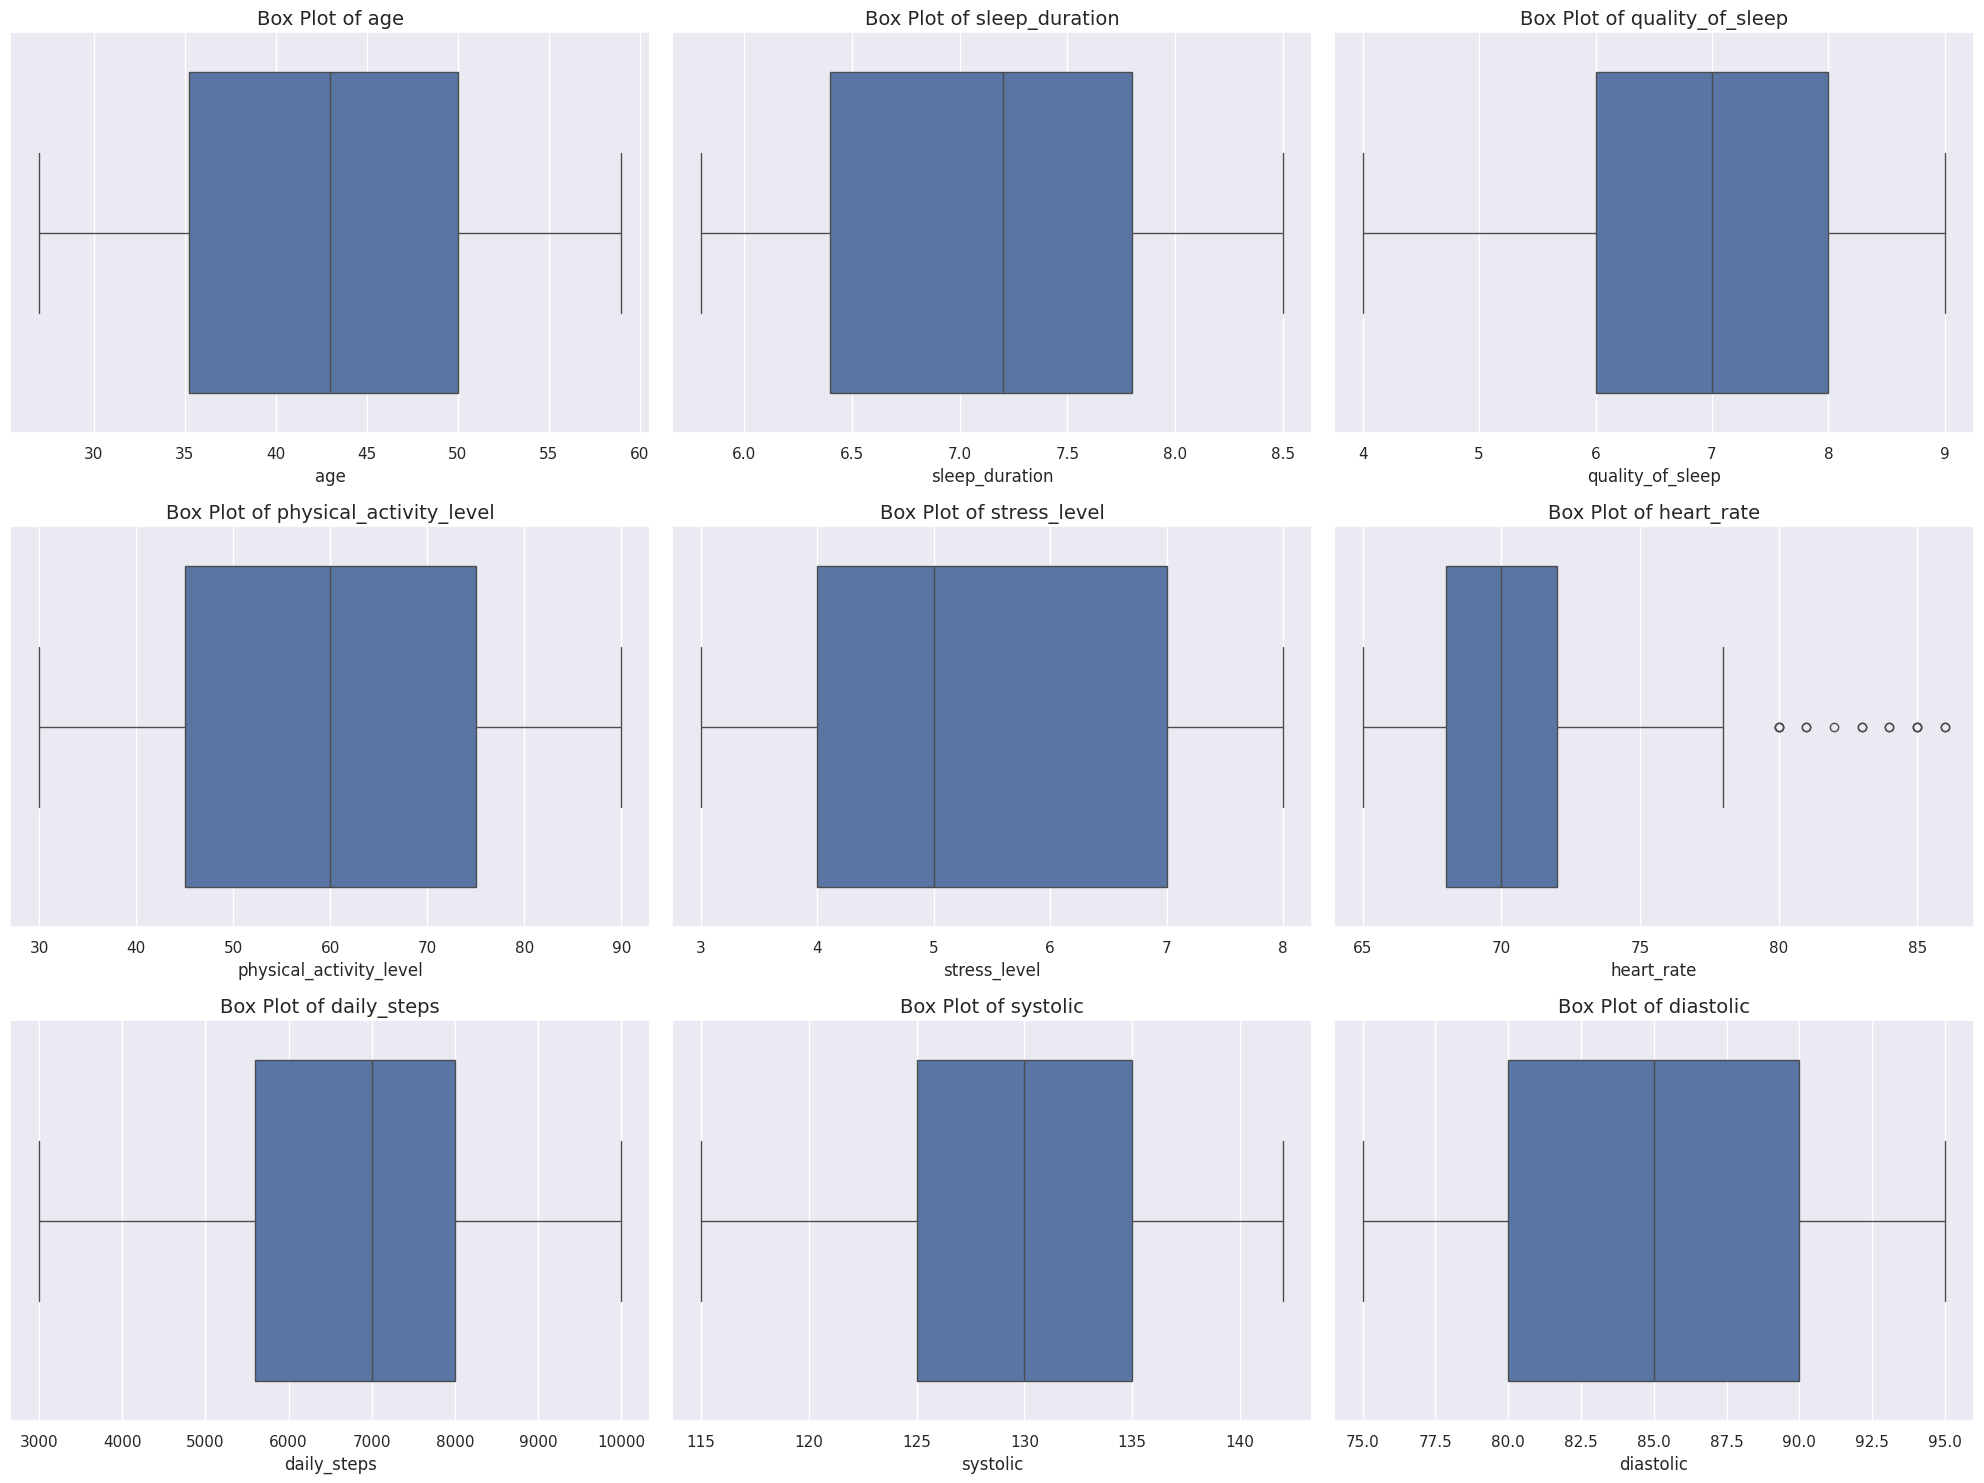

In [ ]:
# List of key numerical variables
num_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

for i, var in enumerate(num_vars):
    row = i // 3
    col = i % 3
    sns.boxplot(x=df[var], ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {var}', fontsize=14)
    axes[row, col].set_xlabel(var, fontsize=12)

plt.tight_layout()
plt.show()

##A. Numeric Values

###**A.1. Correlation**

**The correlation matrix reveals intriguing findings.**
There is a significant correlation between stress level and sleep duration also between stress level and sleep quality.
High and low blood pressure exhibit a very strong correlation.

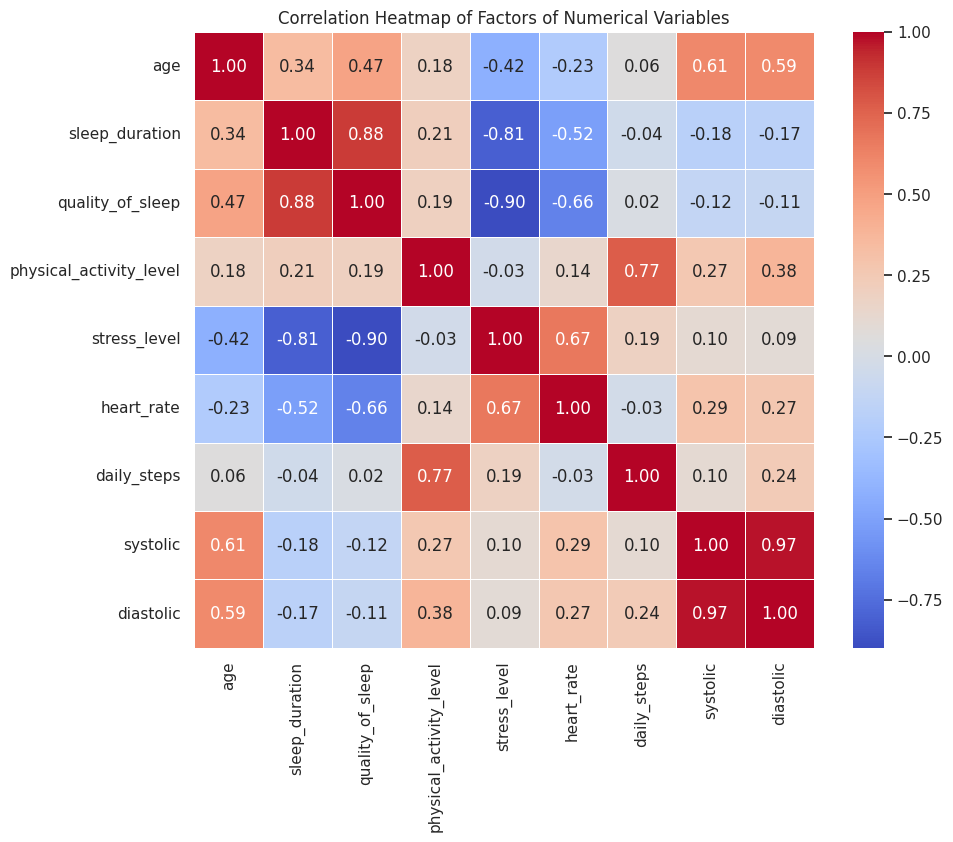

In [ ]:
# Construct linear correlations between features
selected_columns = df.select_dtypes(include=['number'])

correlation_matrix = selected_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Factors of Numerical Variables')
plt.show()

###**Pair Grid**

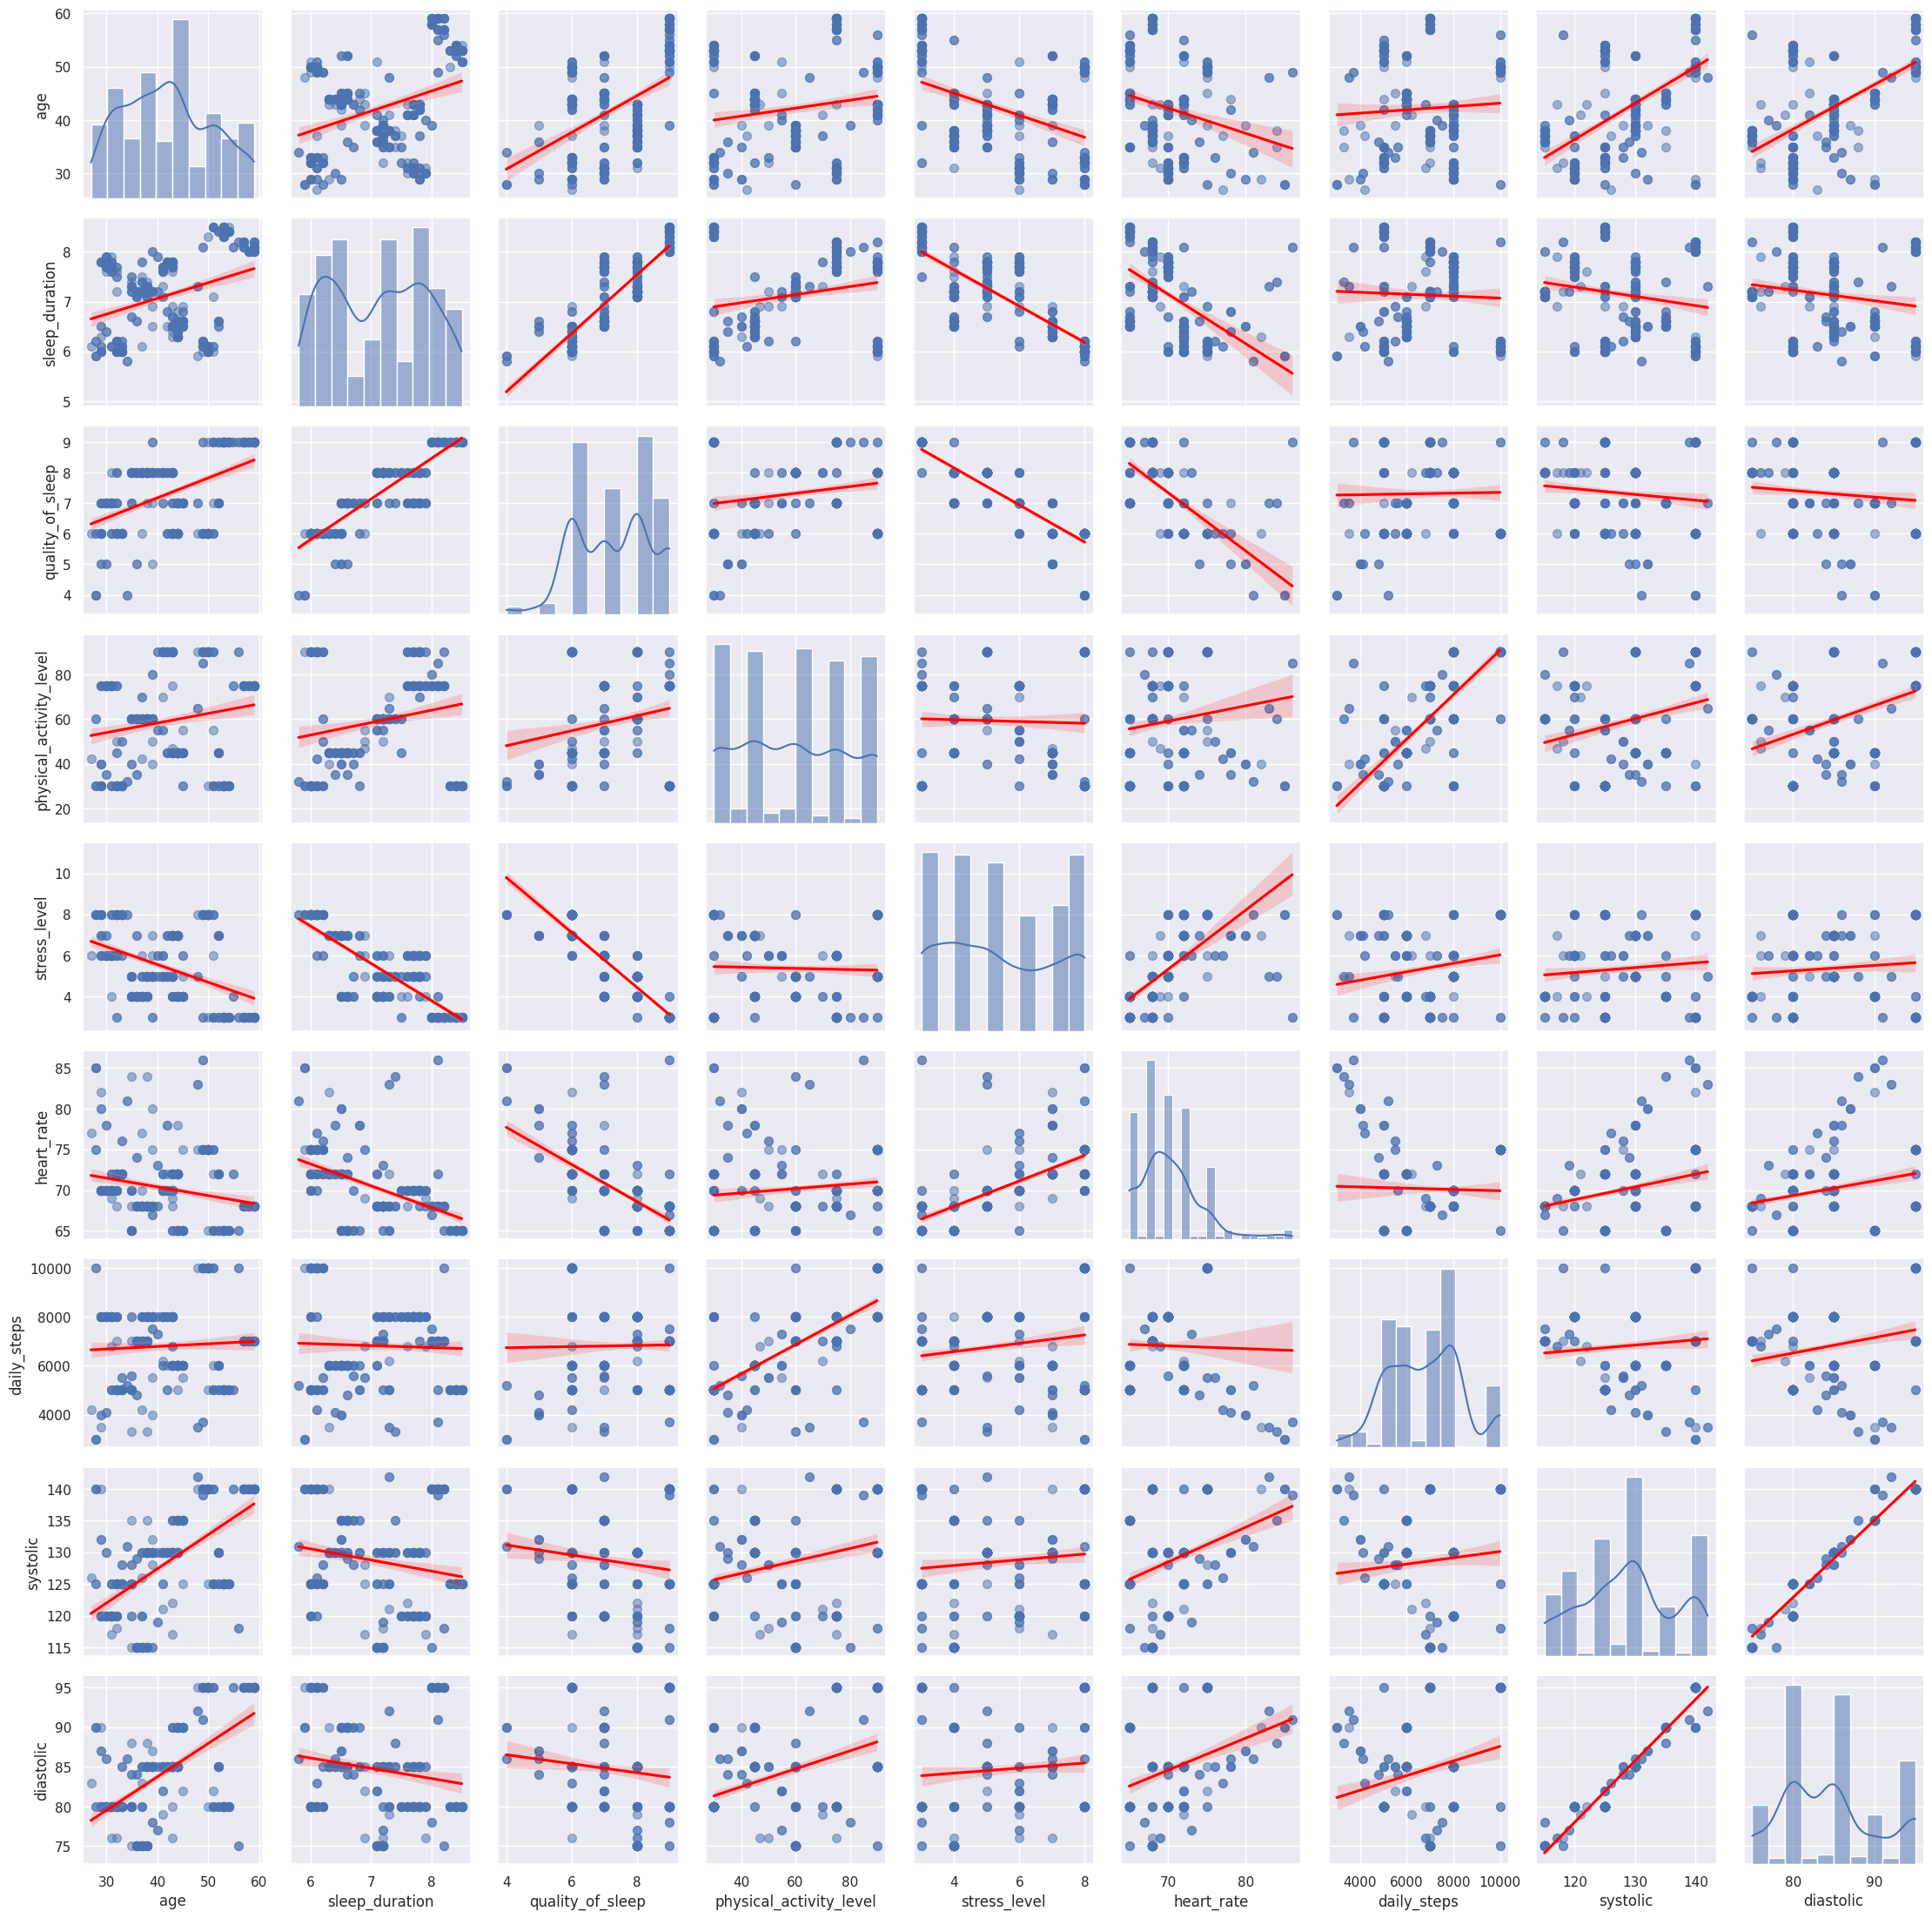

In [ ]:
# Pair Grid instance, mapping a histogram+KDE to the diagonal and regplot to the off-diagonal elements to show the bivariate distributions with a regression line
pair_grid = sns.PairGrid(data=df[num_vars], diag_sharey=False)

pair_grid.map_diag(sns.histplot, kde=True)

pair_grid.map_offdiag(sns.regplot, scatter_kws={'s':50, 'alpha':0.5}, line_kws={'color':'red'})

The visualizations provide multiple insights into the dataset:

Outliers:
The box plots reveal outliers in Heart Rate, however, these "outliers" may be natural extremes and not errors, as they're within conceivable ranges for individuals.

Correlation:
From the scatter plots interpreted along with heat map we can extract the following insights about the relationship between variables:*

Sleep Duration has a strong positive linear relationship with Quality of Sleep backed up by correlation 0.88, suggesting that as the sleep duration increases, the quality of sleep tends to improve. Sleep Duration has a clear negative linear relationships with Stress Level (-0.81) and Heart Rate (-0.52), the latter being less correlated whih might be influensed by outliers, further analysis is required.
Quality of Sleep seems to have strong negative linear relationships with Stress Level (-0.90) and Heart Rate (-0.66) suggesting that individuals with high stress and high heart rates tend to rate lower their quality of sleep.
Stress Level seems to have relatively strong positive linear relationship with Heart Rate (0.67), implying that higher stress levels are associated with higher heart rates.
There is a also positive linear trend between Age and Quality of Sleep with correlation 0.47 suggesting that older individuals tend to have better quality of sleep.
The positive linear relationships can be seen between Age and both Systolic and Diastolic variables with correlations 0.61 and 0.59 respectively.
Systolic and Diastolic are also strongly correlated (0.91).


Histograms:
The distribution of Age seems to be slightly right-skewed, suggesting that there are more individuals in the younger age range than in the older range.
The Quality of Sleep is left-skewed meaning there are more individuals in our data with better quality of sleep.
The Heart Rate seems to have a relatively normal distribution being skewed towards the right end suggesting there are more individuals with lower heart rates.
Looking at the other numerical variables we can see that we do not have a pattern in most variables with half of them showing a balance in the data.

Results from Scatterplot:

The Scatterplot analysis reveals the following insights:

1. Physical Activity Level: It demonstrates a linear relationship with sleep duration, but there is a significant number of outliers in the left-top and right-bottom corners of the plot. The presence of these outliers could be due to extreme values or specific situations where individuals with very low or very high physical activity levels experience abnormal sleep durations.

2. Heart Rate and Sleep Duration: As heart rate increases, sleep duration tends to decrease. However, it is crucial not to hastily conclude causality here, as it is more likely that the relationship is the other way around. Changes in sleep duration could potentially influence heart rate rather than the reverse.

3. Linear Relationships: Most of the variables exhibit somewhat linear relationships with sleep duration. However, the scatterplot faces an issue where some data points overlap, leading to these points being weighted more heavily in the analysis.

Based on these results, no parameters will be eliminated at this stage. Instead, a regularization technique will be employed during the model-building process to exclude irrelevant parameters and prevent overfitting. This approach ensures that all variables are considered during the analysis, and the regularization process will help identify the most influential predictors for the final model.

##**B. Categorical Values**

Plotting some countplots for categorical variables.

Target (Sleep Disorder):

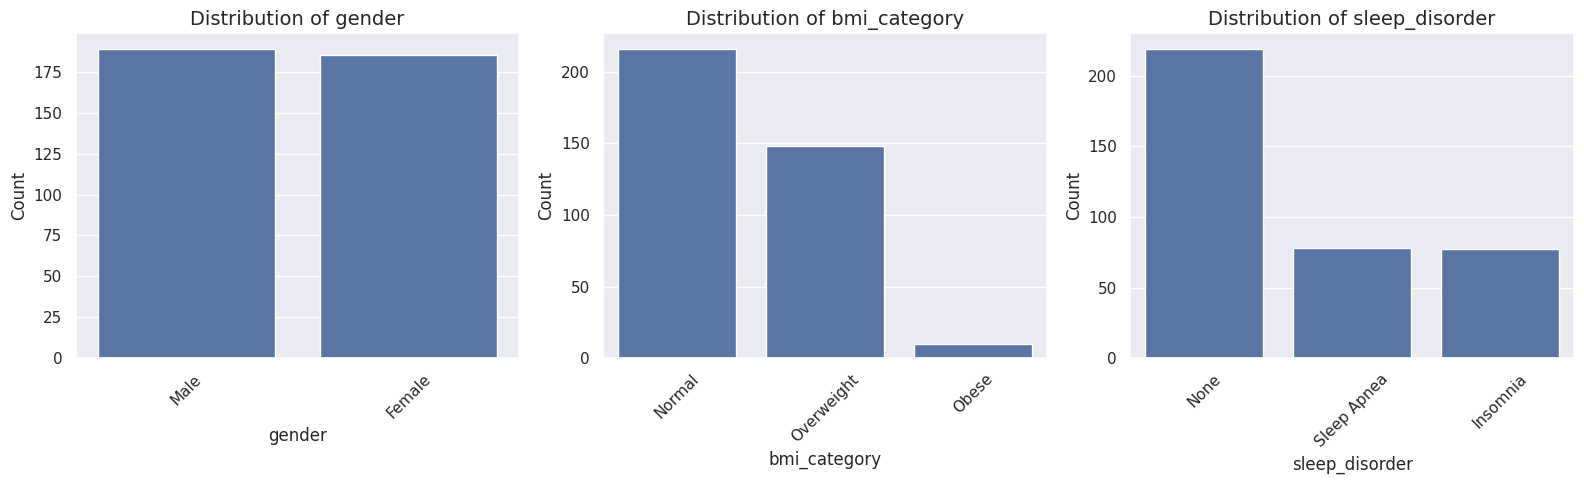

In [ ]:
# Create distribution of categorical variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

for i, var in enumerate(['gender', 'bmi_category', 'sleep_disorder']):
    col = i
    order = df[var].value_counts().index
    sns.countplot(x=var, data=df, ax=axes[col], order=order)
    axes[col].set_title(f'Distribution of {var}', fontsize=14)
    axes[col].set_xlabel(var, fontsize=12)
    axes[col].set_ylabel('Count', fontsize=12)
    axes[col].set_xticklabels(axes[col].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()




Observations:
* It is clear that more men do not experience sleep disorder than women
* It is clear that more men suffer from Insomnia than women
* It is clear that more women suffer from Sleep Apnea than women

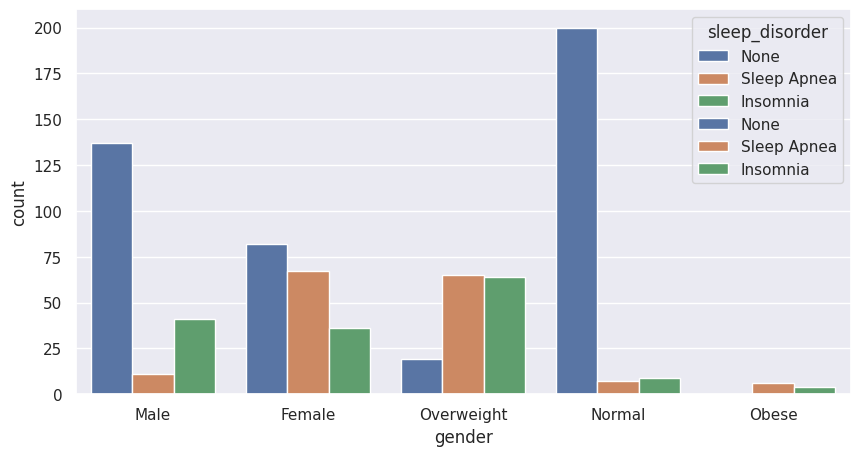

In [ ]:
# Create barplot of sleep disorder based on gender

plt.figure(figsize=(10, 5))
sns.countplot(x='gender', data = df, hue='sleep_disorder')
sns.countplot(x='bmi_category', data = df, hue='sleep_disorder')
plt.show()

In [ ]:
# Count the sleep disorder on each Occupation

df.groupby('sleep_disorder')['occupation'].value_counts()

sleep_disorder  occupation 
Insomnia        Salesperson    29
                Teacher        27
                Accountant      7
                Engineer        5
                Doctor          3
                Nurse           3
                Lawyer          2
                Unknown         1
None            Doctor         64
                Engineer       57
                Lawyer         42
                Accountant     30
                Nurse           9
                Teacher         9
                Unknown         6
                Salesperson     2
Sleep Apnea     Nurse          61
                Doctor          4
                Teacher         4
                Lawyer          3
                Salesperson     3
                Unknown         2
                Engineer        1
Name: count, dtype: int64

Observations:
* The top 3 occupations with Insomnia are Salesperson, Teacher, and Accountant.  
* The top 3 occupations with No Sleep Disorder are Doctor, Engineer, and Lawyer.  
* Nurses have the highest incidence of Sleep Apnea, while Teachers and Salespersons have the highest rates of Insomnia.


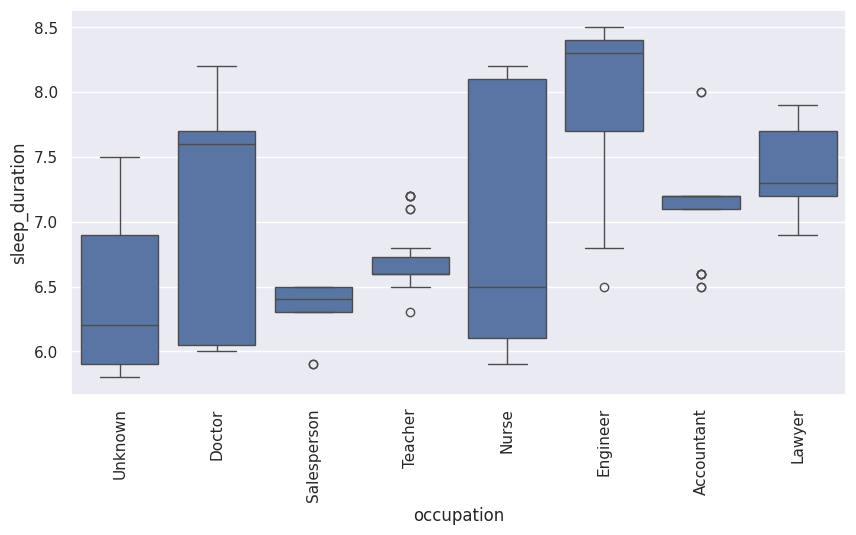

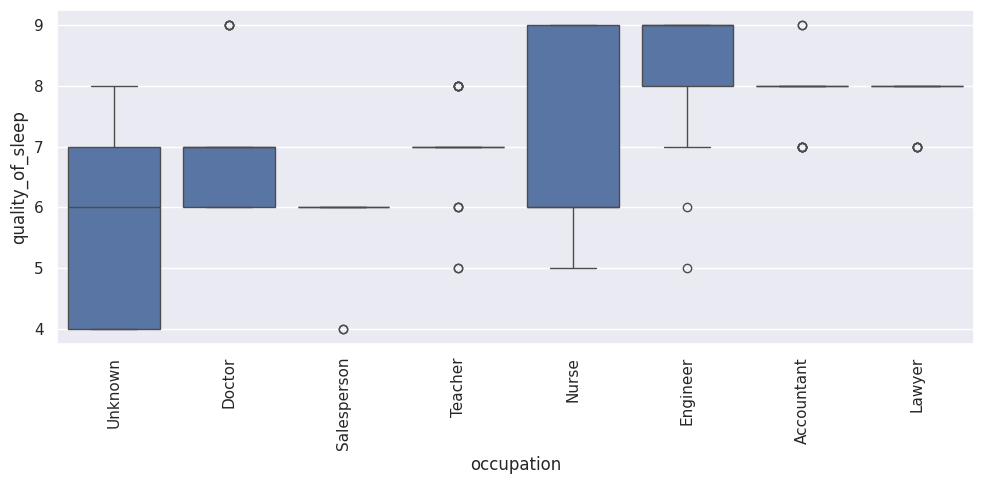

In [ ]:
# Create boxplot on the relationship between occupation and sleep duration and also quality of sleep.

plt.figure(figsize=(10, 5))
sns.boxplot(data=df,y='sleep_duration', x='occupation')
plt.xticks(rotation=90)

plt.figure(figsize=(10, 5))
sns.boxplot(data=df,y='quality_of_sleep', x='occupation')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Observations:
* Age: Individuals with Sleep Apnea tend to be older.
* Sleep Quality: Those with Insomnia and Sleep Apnea report lower sleep quality compared to those with no disorders.
* Physical Activity: Sleep Apnea patients are generally more active, while Insomnia sufferers have lower activity levels.
* Stress Levels: Insomnia is associated with higher stress levels, followed by Sleep Apnea.
* Blood Pressure: Both systolic and diastolic blood pressure are higher in individuals with Sleep Apnea.



###**B.1. Split Boxplot**

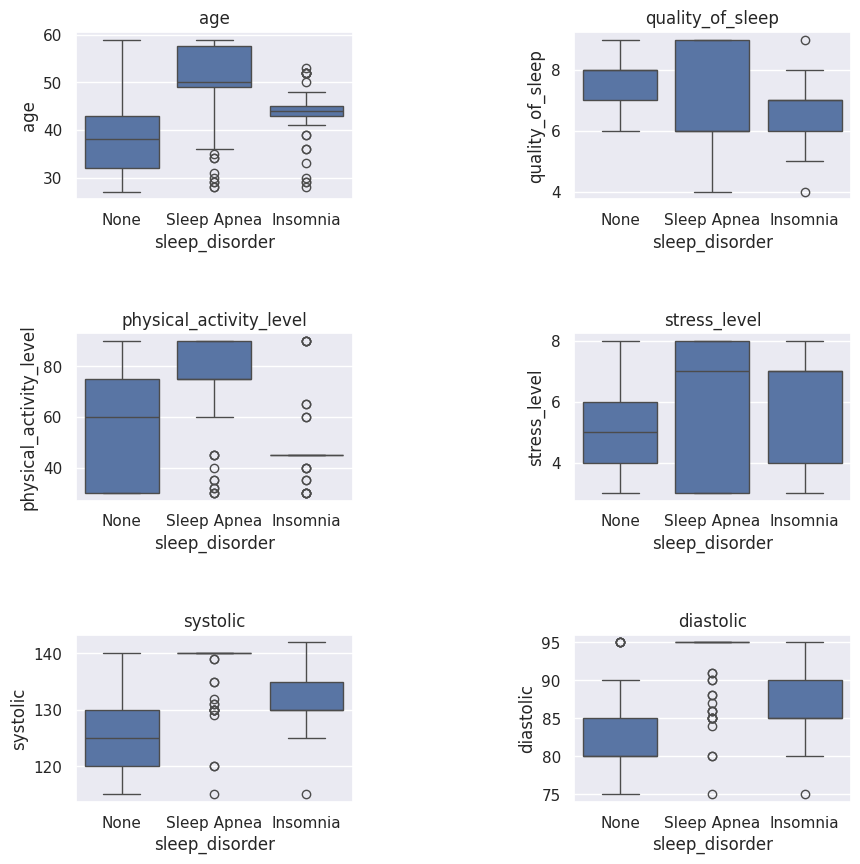

In [ ]:
# Create a grid of plots
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
plt.subplots_adjust(wspace=0.8, hspace=0.8)

numeric_x = ["age", "quality_of_sleep", "physical_activity_level", "stress_level", "systolic", "diastolic", "heart_rate", "daily_steps", "sleep_disorder"]

# Iterate over pairs of parameters
for i, ax in enumerate(axs.flat):
    sns.boxplot(x='sleep_disorder', y=numeric_x[i], data=df, ax=ax).set_title(numeric_x[i])

plt.show()

**Results from Boxplots for Different Levels of Sleep Disorders**

Based on the boxplot analysis, several intriguing patterns emerge:
* Sleep Duration: Nurses and Engineers have longer sleep durations, while Salespersons and Teachers report the shortest sleep.
* Quality of Sleep: Nurses and Engineers experience better sleep quality, while Teachers and Salespersons report lower sleep quality.
* Overall, nurses and engineers seem to fare better in terms of sleep, while salespersons and teachers struggle with both sleep duration and quality.


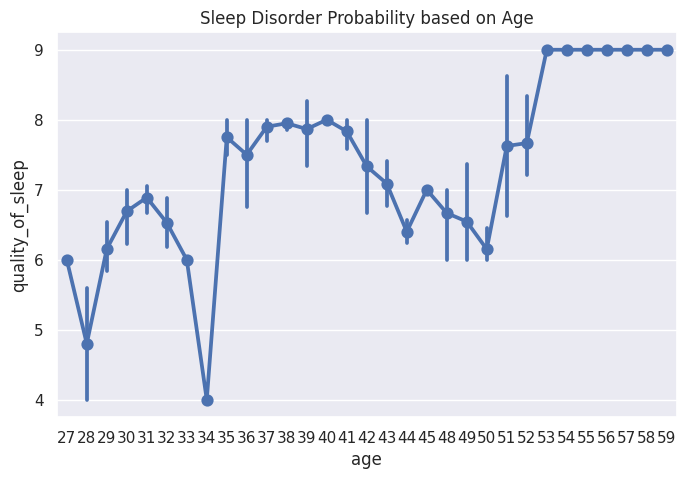

In [ ]:
#Using poin plot, the following code will generate the means of quality of sleep based on the age category
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "quality_of_sleep", x = "age", data = df, ax = ax)
ax.set_title("Sleep Disorder Probability based on Age")
plt.show()

numerical = ["age", "sleep_duration", "quality_of_sleep", "physical_activity_level", "stress_level", "heart_rate", "daily_steps", "sbp_mm_hg", "dbp_mm_hg"]


This chart appears to be a line plot with error bars, showing the relationship between age (on the x-axis) and the quality of sleep (on the y-axis). The title suggests it's related to the probability of sleep disorders across different age groups.

Observations:
* Fluctuations in younger ages (27-34): The sleep quality varies considerably in this range, with notable dips (such as at age 34) indicating possible higher probabilities of sleep disorders or disruptions.
* Stability in mid-30s to early 40s: Between ages 35 and 43, there’s a relatively stable and higher sleep quality, suggesting a lower chance of sleep disorders.
* Decline from early 40s to late 40s: From 44 to 48, there is a noticeable decline in sleep quality, possibly indicating increasing sleep disturbances in this age range.
* Improvement and stabilization in early 50s: Sleep quality improves significantly around age 50 and remains high and stable up to age 59, suggesting a reduced probability of sleep disorders later in life.
* The error bars indicate the variability or uncertainty in the measurements at each age.


# **C. Statistical Test**

**Label Encoding**

We have to do a label encoding for categorical variables in X to convert categorical data into numerical format, which machine learning algorithms can more easily process. By doing that, now we have all the 12 categories in numerical format and we can do non-tree based models such as linear regression or logistic regression.

The label-encoded categorical variables allow the model to identify patterns and relationships between these features and the target variable (e.g., the presence or severity of sleep disorders), enabling better model training and predictions for sleep disorders.


In [ ]:
X = df.drop(['sleep_disorder'], axis=1)
y = df['sleep_disorder']

# Label encoding for categorical variables in X
label_encoders = {}  # To store the encoder objects for potential inverse transformations later

for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encoding the target variable
le_target = LabelEncoder()
y = le_target.fit_transform(y)

X.head(), y[:5]

(   gender  age  occupation  sleep_duration  quality_of_sleep  \
 0       1   27           7             6.1                 6   
 1       1   28           1             6.2                 6   
 2       1   28           1             6.2                 6   
 3       1   28           5             5.9                 4   
 4       1   28           5             5.9                 4   
 
    physical_activity_level  stress_level  bmi_category  heart_rate  \
 0                       42             6             2          77   
 1                       60             8             0          75   
 2                       60             8             0          75   
 3                       30             8             1          85   
 4                       30             8             1          85   
 
    daily_steps  systolic  diastolic  
 0         4200       126         83  
 1        10000       125         80  
 2        10000       125         80  
 3         3000       14

We will train Random Forest Classifiers to extract feature importance.

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Apply StandardScaler to Numerical Variables
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test_scaled[num_vars] = scaler.transform(X_test[num_vars])

Text(0.5, 1.0, 'Feature Importance')

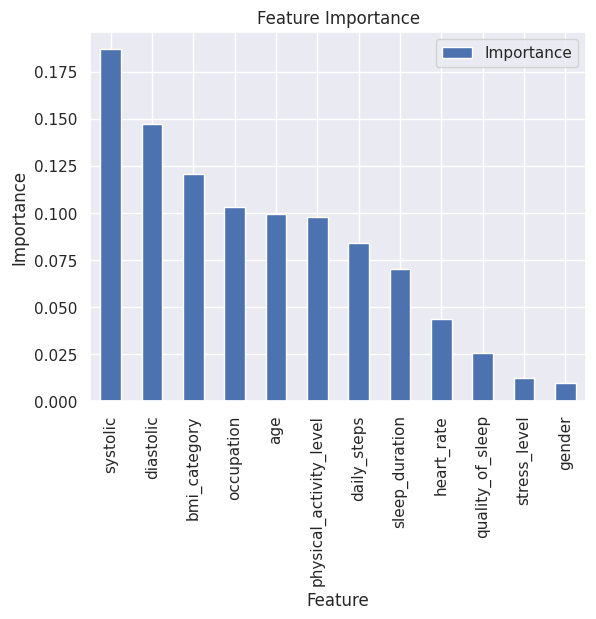

In [ ]:
# Training RandomForestClassifier to extract feature importance

rf = RandomForestClassifier(class_weight='balanced', random_state=42,bootstrap= True, max_depth= None, min_samples_leaf=1, min_samples_split=10, n_estimators= 50).fit(X_train, y_train)

feature_importances = rf.feature_importances_

features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

features_df.sort_values(by='Importance', ascending=False).plot(x='Feature',y='Importance',kind='bar')
plt.ylabel('Importance')
plt.title('Feature Importance')

The feature importance analysis from the Random Forest model reveals that the most significant factor in predicting sleep disorders is **Systolic blood pressure**, with an importance of approximately 19%. This is followed by **Diastolic blood pressure** (15%), **BMI category** (12%), **Occupation** (12%), and other features.

In [ ]:
# Exclude variables that don't have significant effect on the sleep disorder condition
df.drop(['stress_level', 'quality_of_sleep', 'heart_rate', 'sleep_duration', 'daily_steps'], axis=1, inplace = True)
df

,gender,age,occupation,physical_activity_level,bmi_category,sleep_disorder,systolic,diastolic
0,Male,27,Unknown,42,Overweight,None,126,83
1,Male,28,Doctor,60,Normal,None,125,80
2,Male,28,Doctor,60,Normal,None,125,80
3,Male,28,Salesperson,30,Obese,Sleep Apnea,140,90
4,Male,28,Salesperson,30,Obese,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,75,Overweight,Sleep Apnea,140,95
370,Female,59,Nurse,75,Overweight,Sleep Apnea,140,95
371,Female,59,Nurse,75,Overweight,Sleep Apnea,140,95
372,Female,59,Nurse,75,Overweight,Sleep Apnea,140,95


Remember to do the **F-test** and the **t-test** hypothesis testing to test whether our model is useful or not and to test the significance of the predictor variables. For this case, we use the significance level $α = 0.05$. We will reject the null hypothesis $H_0$ if the $p$-$value < \alpha$.

The hypothesis for the **F-test** is:
$$
H_0 : \beta_1 = \beta_2 = \ldots = \beta_p = 0 \\
H_1 : At \space least \space 1 \space \beta_i \ne 0 \\
$$

From the output above, we could see the p-value for the F-test is $1.21 \times 10^{-111}$ which is very small, then we reject the null hypothesis $H_0$ and proceed with the t-test to test the significance of the variables partially. The rejection of the null hypothesis $H_0$ in the F-test indicates that the model is useful.

The hypothesis for the **t-test** is:
$$
H_0 : \beta_i = 0 \\
H_1 : \beta_i \ne 0 \\
$$

From the output above, we could see the p-value for the many variables are bigger than the $\alpha = 0.05$ that we defined earlier. Therefore, we should consider **removing** them because they are not **statistically significant**.

We will perform ANOVA test to the hypotheses and significance level, so we can come up with the conclusion based on the p-value.

**ANOVA**

In [ ]:
# Perform ANOVA (F-Test) on the impact of age to sleep disorder

insomnia = df[df["sleep_disorder"] == "Insomnia"]["age"]
sleep_apnea = df[df["sleep_disorder"] == "Sleep Apnea"]["age"]
normal = df[df["sleep_disorder"] == "None"]["age"]

f_stat, p_value = f_oneway(insomnia, sleep_apnea, normal)

print(f"F-statistic = {f_stat}")
print(f"P-value = {p_value}")

if p_value < 0.05:
        print("Conclusion: There is a significant difference in age between Insomnia, Sleep Apnea, and Normal categories.")
else:
    print("Conclusion: There is no significant difference in age between Insomnia, Sleep Apnea, and Normal categories.")


F-statistic = 58.40896314611008
P-value = 8.852104933457365e-23
Conclusion: There is a significant difference in age between Insomnia, Sleep Apnea, and Normal categories.


In [ ]:
# Perform ANOVA (F-Test) on the impact of physical activity level to sleep disorder

insomnia = df[df["sleep_disorder"] == "Insomnia"]["physical_activity_level"]
sleep_apnea = df[df["sleep_disorder"] == "Sleep Apnea"]["physical_activity_level"]
normal = df[df["sleep_disorder"] == "None"]["physical_activity_level"]

f_stat, p_value = f_oneway(insomnia, sleep_apnea, normal)

print(f"F-statistic = {f_stat}")
print(f"P-value = {p_value}")

if p_value < 0.05:
    print("Conclusion: There is a significant difference in physical activity level between Insomnia, Sleep Apnea, and Normal categories.")
else:
    print("Conclusion: There is no significant difference in physical activity level between Insomnia, Sleep Apnea, and Normal categories.")


F-statistic = 44.15057863487179
P-value = 6.3061837730488095e-18
Conclusion: There is a significant difference in physical activity level between Insomnia, Sleep Apnea, and Normal categories.


In [ ]:
# Perform ANOVA (F-test) on the systolic level for sleep disorders

insomnia = df[df["sleep_disorder"] == "Insomnia"]["systolic"]
sleep_apnea = df[df["sleep_disorder"] == "Sleep Apnea"]["systolic"]
normal = df[df["sleep_disorder"] == "None"]["systolic"]

f_stat, p_value = f_oneway(insomnia, sleep_apnea, normal)

print(f"F-statistic = {f_stat}")
print(f"P-value = {p_value}")

if p_value < 0.05:
    print("Conclusion: There is a significant difference in systolic level among the Insomnia, Sleep Apnea, and Normal groups.")
else:
    print("Conclusion: There is no significant difference in systolic level among the Insomnia, Sleep Apnea, and Normal groups.")


F-statistic = 214.5854142843397
P-value = 1.198027256511212e-62
Conclusion: There is a significant difference in systolic level among the Insomnia, Sleep Apnea, and Normal groups.


In [ ]:
# Perform ANOVA (F-test) on the diastolic level for sleep disorder
insomnia = df[df["sleep_disorder"] == "Insomnia"]["diastolic"]
sleep_apnea = df[df["sleep_disorder"] == "Sleep Apnea"]["diastolic"]
normal = df[df["sleep_disorder"] == "None"]["diastolic"]

f_stat, p_value = f_oneway(insomnia, sleep_apnea, normal)

print(f"F-statistic = {f_stat}")
print(f"P-value = {p_value}")

if p_value < 0.05:
    print("Conclusion: There is a significant difference in diastolic level among the Insomnia, Sleep Apnea, and Normal groups.")
else:
    print("Conclusion: There is no significant difference in diastolic level among the Insomnia, Sleep Apnea, and Normal groups.")


F-statistic = 268.0979060890734
P-value = 9.232470235026759e-73
Conclusion: There is a significant difference in diastolic level among the Insomnia, Sleep Apnea, and Normal groups.


Based on the ANOVA results for the four variables, here are some observations regarding their relationship with the sleep disorder:
1. Gender:
   - The F-value is 5.581156, and the p-value (PR(>F)) is 0.018669.
   - Since the p-value is less than 0.05, gender has a significant effect on sleep disorder.
2. Occupation:
   - The F-value is 28.724827, with a p-value of 1.70390e-31.
   - This extremely small p-value (close to 0) indicates a strong significant effect of occupation on sleep disorder.
3. BMI Category:
   - The F-value is 61.448176, and the p-value is 4.83609e-14.
   - Like occupation, BMI category also has a very significant impact on sleep disorder, as evidenced by the very low p-value.
4. Sleep Duration:
   - The F-value is 2.27907e+29, with a p-value of 0.0.
   - This indicates a strong statistical significance of sleep duration in relation to sleep disorder, suggesting it plays a critical role.

In summary, all four variables (gender, occupation, BMI category, and sleep duration) have a statistically significant impact on sleep disorders, with occupation, BMI category, and sleep duration showing particularly strong effects.

Perform Chi-square Test for Independence

In [ ]:
# Perform the Chi-square test of independence
contingency_table = pd.crosstab(df['bmi_category'], df['sleep_disorder'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square Test for Independence")
print("================================")
print(f"Chi2 Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print()

print("Conclusion:")
alpha = 0.05
if p < alpha:
    print("Reject H0: There is a significant association between BMI category and sleep disorder.")
else:
    print("Fail to reject H0: There is no significant association between BMI category and sleep disorder.")


Chi-square Test for Independence
Chi2 Statistic: 245.66534355746683
p-value: 5.5883512097923584e-52
Degrees of Freedom: 4

Conclusion:
Reject H0: There is a significant association between BMI category and sleep disorder.


In [ ]:
# Perform the Chi-square test for independence
contingency_table = pd.crosstab(df['occupation'], df['sleep_disorder'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square Test for Independence")
print("================================")
print(f"Chi2 Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print()

print("Conclusion:")
alpha = 0.05
if p < alpha:
    print("Reject H0: There is a significant association between occupation and sleep disorder.")
else:
    print("Fail to reject H0: There is no significant association between occupation and sleep disorder.")

Chi-square Test for Independence
Chi2 Statistic: 401.6055551972881
p-value: 5.8190777743484385e-77
Degrees of Freedom: 14

Conclusion:
Reject H0: There is a significant association between occupation and sleep disorder.


Perform the Chi-square test for independence on BMI category and occupation to sleep disorder. Based on the results of the Chi-square tests for independence, here are key observations:
1. Test for BMI Category and Sleep Disorder:
   - Chi2 Statistic: 245.67
   - p-value: 5.59e-52 (extremely small)
   - Degrees of Freedom: 4

   Conclusion:
- The p-value is much smaller than the typical significance level (e.g., 0.05), so we reject the null hypothesis
(H0), which states there is no association between BMI category and sleep disorder.
- This suggests a significant association between BMI category and sleep disorder, indicating that individuals' BMI classifications (e.g., normal, overweight, obese) are related to whether they experience sleep disorders.

2. Test for Occupation and Sleep Disorder:
   - Chi2 Statistic: 401.61
   - p-value: 5.82e-77 (extremely small)
   - Degrees of Freedom: 14

   Conclusion:
- Again, the p-value is far below the common significance threshold (e.g., 0.05), leading to the rejection of the null hypothesis (H0) that there is no association between occupation and sleep disorder.
- This means there is a significant association between occupation and sleep disorder, implying that the type of occupation a person holds is related to their likelihood of experiencing sleep disorders.

Summary:
In both cases, the Chi-square tests show significant associations between the respective categorical variables (BMI category and occupation) and the presence of sleep disorders. This suggests that both BMI classification and type of occupation are important factors linked to the prevalence of sleep disorders in the population under study.


# **Build Regression Model**

Based on the results of previous statistical tests, we know that there are several variables that significantly influence the condition of a bad sleeping habit. We will prioritize these variables in building the regression model. We will do the variable selection by excluding insignificant variables.


In [ ]:
# Build and fit OLS model
le = LabelEncoder()
df['sleep_disorder'] = le.fit_transform(df['sleep_disorder'])

formula = "sleep_disorder ~ age + physical_activity_level + C(occupation) + C(bmi_category) + diastolic + systolic"

model = smf.ols(formula=formula, data=df)
results_model = model.fit()

print(results_model.summary())

def get_coef_std_err(results):
    summary_frame = results.summary2().tables[1]
    return summary_frame[['Coef.', 'Std.Err.']]

results = get_coef_std_err(results_model)
print(results)


                            OLS Regression Results                            
Dep. Variable:         sleep_disorder   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     35.49
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           1.39e-56
Time:                        14:39:12   Log-Likelihood:                -211.73
No. Observations:                 374   AIC:                             451.5
Df Residuals:                     360   BIC:                             506.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

# **Analyze and Interpret The Result**

The overall OLS Regression model shows a moderate fit, with several independent variables explaining sleep disorders, though not all variables are statistically significant.

The warning and extreme values suggest that the model needs revision or correction, possibly by modifying the predictor variables, adjusting the model, or addressing data issues such as perfect prediction or small sample size for certain categories.

Statistically significant correlations usually have higher values, closer to 1 or -1. Correlation close to 0 indicates a weak relationship or no relationship.


# **Conclusion**

**Summary**

Overall, the analysis reveals that occupation, BMI category, and sleep duration all have a statistically significant impact on sleep disorders. Chi-square tests confirm significant associations between both BMI category and occupation with the prevalence of sleep disorders in the studied population. The variables and model fitting can be understood as the following:
1. 	Occupational Influence:
Certain occupations, such as Doctor, Engineer, Lawyer, Nurse, and Unknown, significantly predict sleep disorders. Other occupations, like Teacher and Salesperson, do not show a meaningful association with sleep disorders.
2. 	BMI and Sleep Disorders:
Obesity is strongly correlated with sleep disorders, while being overweight shows a weaker, non-significant relationship (p = 0.090). This suggests that obesity has a more direct impact on sleep health than being moderately overweight.
3. 	Other Factors:
Variables like age, physical activity, and blood pressure (diastolic and systolic) do not significantly predict sleep disorders, indicating they may play a lesser role or be overshadowed by stronger factors like occupation and BMI.
4.  	Model Fit and Multicollinearity:
The model explains 56.2% of the variance, indicating a moderate fit. However, a high condition number suggests potential multicollinearity, meaning some predictors may be highly correlated, which could affect the reliability of the coefficient estimates.


**Recommendations**

For Business:
* Prioritize employee health programs, particularly those addressing obesity and sleep health, as these have a strong correlation with sleep disorders.
* Consider offering specialized wellness initiatives for professions most affected, such as Doctors, Engineers, and Nurses.
* Implement flexible working hours or stress management programs to mitigate the impact of high-stress occupations on sleep quality.

For Experiment:
* Further investigate the relationship between BMI and sleep disorders, focusing on the differences between overweight and obese categories.
* Explore additional variables that may influence sleep disorders but weren't significant in this study, such as stress levels or dietary habits.
* Address multicollinearity in future models by either refining or reducing correlated predictors to improve accuracy in estimating effects.

